# Sandbox - Utils

In [30]:
import os
import matplotlib.pyplot as plt
from calibration.image_processing import read_image, show_image, reflect_image, rotate_image, crop_square_roi

In [31]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern Roman']
plt.rcParams['text.usetex'] = True

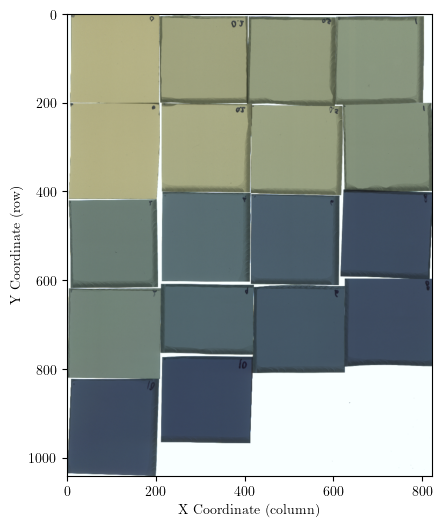

(1041, 822, 3)


In [32]:
# ------------------------ EJEMPLO DE USO ------------------------

# 1) Especifica la ruta de tu imagen TIFF
ruta = os.path.join('media', 'Dosis0a10.tif')

# Leer la imagen TIFF
imagen = read_image(ruta)

# 2) Muestra la imagen original para determinar dónde quieres recortar.
show_image(imagen)
print(imagen.shape)

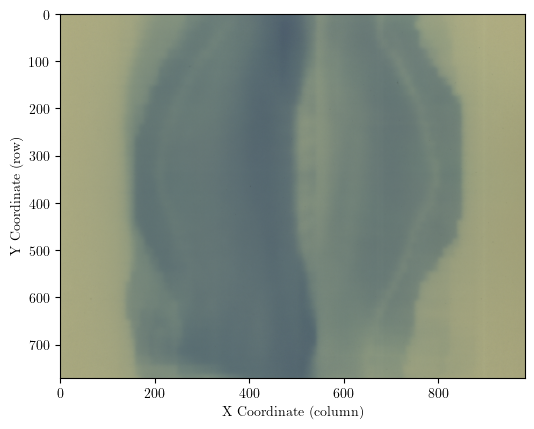

(770, 984, 4)


In [33]:
ruta_film = os.path.join('media', 'mama100cropped.tif')
imagen_film = read_image(ruta_film)
show_image(imagen_film)
print(imagen_film.shape)

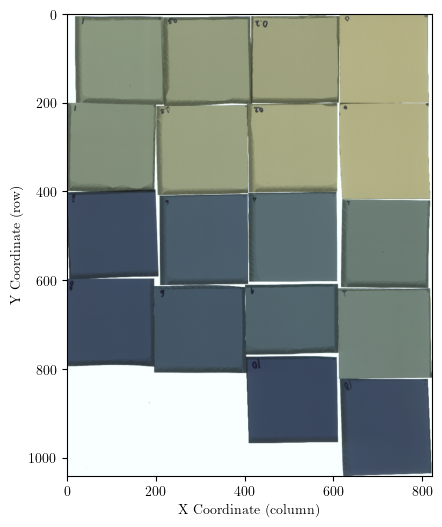

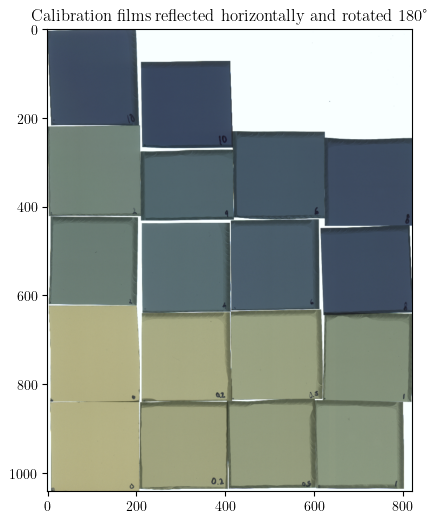

In [34]:
imagen_reflejada = reflect_image(imagen, mode='horizontal')
show_image(imagen_reflejada)

imagen_girada = rotate_image(imagen_reflejada, times=2, direction='clockwise')
_ = show_image(imagen_girada, title='Calibration films reflected horizontally and rotated 180°', show_labels=False)

In [35]:
# Diccionario con las coordenadas de las ROIs cuadradas
rois = {
    '0 Gy': (),
    '0.2 Gy': (),
    '0.5 Gy': (),
    '1 Gy': (),
    '2 Gy': (),
    '4 Gy': (),
    '6 Gy': (),
    '8 Gy': (),
    '10 Gy': (),
}

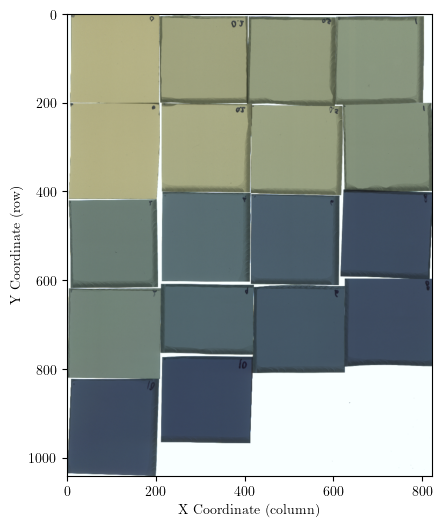

In [36]:
_ = show_image(imagen)

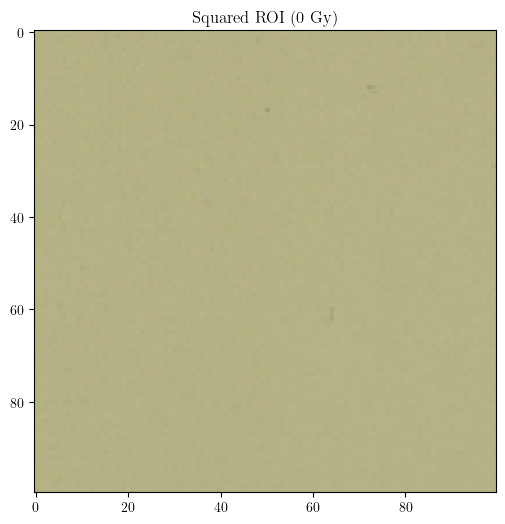

In [37]:
# Ahora, usando la imagen mostrada, elige manualmente:
#  - La esquina superior izquierda (x, y) donde comenzar el recorte
#  - El lado del cuadrado que desees

# 3) Define las coordenadas de la ROI (recuerda: x es columna, y es fila)
x_inicial = 50   # Ejemplo
y_inicial = 50  # Ejemplo
lado_roi  = 100  # ROI cuadrada de 200x200

# 4) Recorta la ROI
roi_cuadrada = crop_square_roi(imagen, x_inicial, y_inicial, lado_roi)

# 5) Muestra la ROI recortada

_ = show_image(roi_cuadrada, title="Squared ROI (0 Gy)", show_labels=False, show_axis=False)


## Graficar ROI

In [38]:
from calibration.image_processing import filter_image
import numpy as np

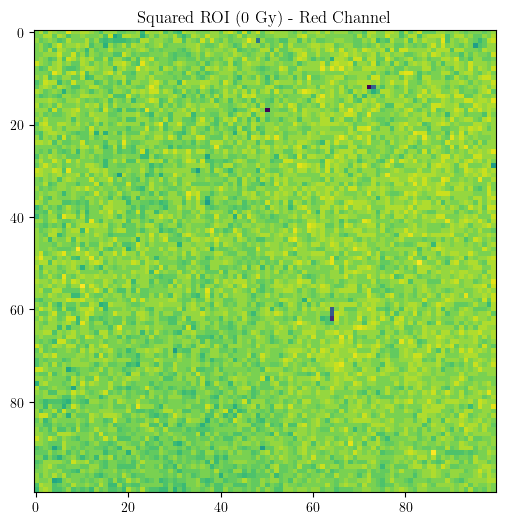

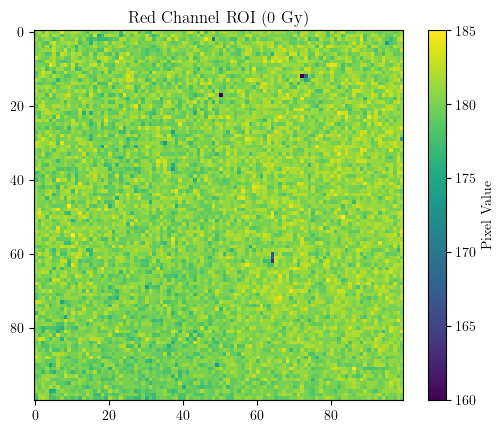

In [39]:
# 4) Recorta la ROI
roi_cuadrada_rojo = crop_square_roi(imagen, x_inicial, y_inicial, lado_roi)[..., 0]

# 5) Muestra la ROI recortada
vmin, vmax = roi_cuadrada_rojo.min(), roi_cuadrada_rojo.max()

_ = show_image(roi_cuadrada_rojo, title="Squared ROI (0 Gy) - Red Channel", show_labels=False, show_axis=False)
plt.imshow(roi_cuadrada_rojo, vmin=vmin, vmax=vmax)
plt.colorbar(label='Pixel Value')
plt.title('Red Channel ROI (0 Gy)')
plt.show()

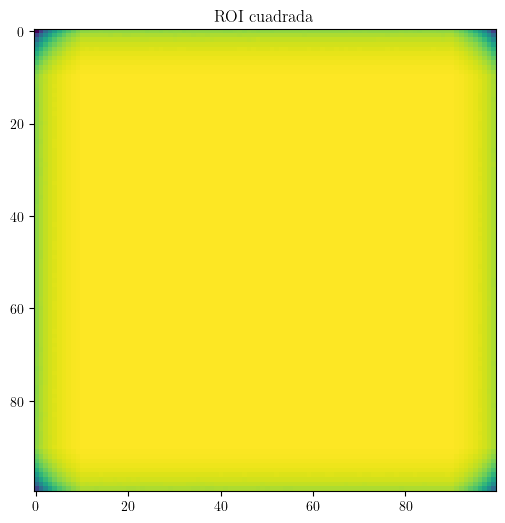

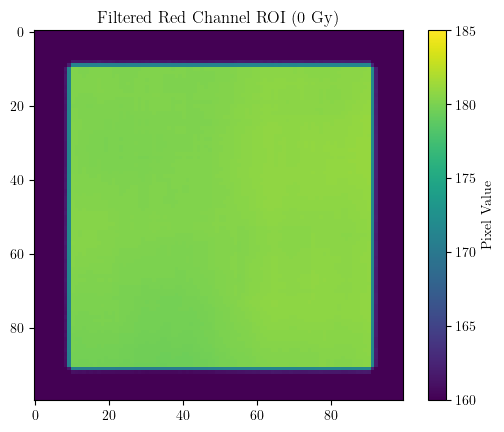

In [40]:
# 4) Recorta la ROI
roi_cuadrada_processed = filter_image(roi_cuadrada_rojo, filter_type='wiener', kernel_size=20)

# 5) Muestra la ROI recortada

_ = show_image(roi_cuadrada_processed, title="ROI cuadrada", show_labels=False, show_axis=False)
plt.imshow(roi_cuadrada_processed, vmin=vmin, vmax=vmax)
plt.colorbar(label='Pixel Value')
plt.title('Filtered Red Channel ROI (0 Gy)')
plt.show()

## Continuación

In [41]:
orden_dosis = [0]*2 + [2]*2 + [0.2]*2 + [4]*2 + [0.5]*2 + [6]*2 + [1]*2 + [8]*2 + [10]*2
print(orden_dosis)

[0, 0, 2, 2, 0.2, 0.2, 4, 4, 0.5, 0.5, 6, 6, 1, 1, 8, 8, 10, 10]


In [42]:
"""
lado_roi = 100    
index = 0

for i in range(0+50,800,200):
    for j in range(0+50,800,200):
        print(i,j)

        dosis = orden_dosis[index]
        print(dosis)
        #coordenadas_rois[dosis] = (i,j)

        calibracion.agregar_roi(dosis, x=i, y=j, tamano=lado_roi)

        roi_cuadrada = recortar_roi_cuadrada(imagen, i, j, lado_roi)

        plt.figure(figsize=(4, 4))
        plt.imshow(roi_cuadrada)
        plt.title("ROI Cuadrada")
        plt.axis('off')
        plt.show()

        index += 1	
"""

'\nlado_roi = 100    \nindex = 0\n\nfor i in range(0+50,800,200):\n    for j in range(0+50,800,200):\n        print(i,j)\n\n        dosis = orden_dosis[index]\n        print(dosis)\n        #coordenadas_rois[dosis] = (i,j)\n\n        calibracion.agregar_roi(dosis, x=i, y=j, tamano=lado_roi)\n\n        roi_cuadrada = recortar_roi_cuadrada(imagen, i, j, lado_roi)\n\n        plt.figure(figsize=(4, 4))\n        plt.imshow(roi_cuadrada)\n        plt.title("ROI Cuadrada")\n        plt.axis(\'off\')\n        plt.show()\n\n        index += 1\t\n'

In [43]:
#_ = mostrar_imagen(imagen)

In [44]:
"""
x_inicial = 50   # Ejemplo
y_inicial = 850  # Ejemplo
lado_roi  = 100  # ROI cuadrada de 200x200

# 4) Recorta la ROI
roi_cuadrada = recortar_roi_cuadrada(imagen, x_inicial, y_inicial, lado_roi)

# 5) Muestra la ROI recortada
plt.figure(figsize=(4, 4))
plt.imshow(roi_cuadrada, cmap='gray')
plt.title("ROI Cuadrada")
plt.axis('off')
plt.show()

calibracion.agregar_roi(10, x=x_inicial, y=y_inicial, tamano=lado_roi)

###################################

x_inicial = 250   # Ejemplo
y_inicial = 800  # Ejemplo
lado_roi  = 100  # ROI cuadrada de 200x200

# 4) Recorta la ROI
roi_cuadrada = recortar_roi_cuadrada(imagen, x_inicial, y_inicial, lado_roi)

# 5) Muestra la ROI recortada
plt.figure(figsize=(4, 4))
plt.imshow(roi_cuadrada, cmap='gray')
plt.title("ROI Cuadrada")
plt.axis('off')
plt.show()

calibracion.agregar_roi(10, x=x_inicial, y=y_inicial, tamano=lado_roi)
"""

'\nx_inicial = 50   # Ejemplo\ny_inicial = 850  # Ejemplo\nlado_roi  = 100  # ROI cuadrada de 200x200\n\n# 4) Recorta la ROI\nroi_cuadrada = recortar_roi_cuadrada(imagen, x_inicial, y_inicial, lado_roi)\n\n# 5) Muestra la ROI recortada\nplt.figure(figsize=(4, 4))\nplt.imshow(roi_cuadrada, cmap=\'gray\')\nplt.title("ROI Cuadrada")\nplt.axis(\'off\')\nplt.show()\n\ncalibracion.agregar_roi(10, x=x_inicial, y=y_inicial, tamano=lado_roi)\n\n###################################\n\nx_inicial = 250   # Ejemplo\ny_inicial = 800  # Ejemplo\nlado_roi  = 100  # ROI cuadrada de 200x200\n\n# 4) Recorta la ROI\nroi_cuadrada = recortar_roi_cuadrada(imagen, x_inicial, y_inicial, lado_roi)\n\n# 5) Muestra la ROI recortada\nplt.figure(figsize=(4, 4))\nplt.imshow(roi_cuadrada, cmap=\'gray\')\nplt.title("ROI Cuadrada")\nplt.axis(\'off\')\nplt.show()\n\ncalibracion.agregar_roi(10, x=x_inicial, y=y_inicial, tamano=lado_roi)\n'

# Modulo FilmCalibration

In [45]:
from calibration.calibration import FilmCalibration

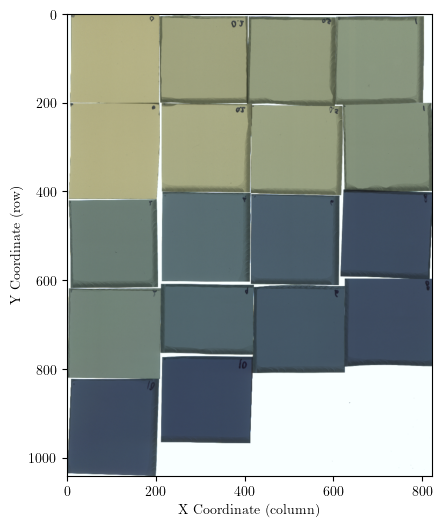

In [46]:
ruta = os.path.join('media', 'Dosis0a10.tif')
imagen_groundtruth = read_image(ruta)
show_image(imagen_groundtruth)

calibracion = FilmCalibration(imagen_groundtruth, fitting_function_name='cuadratic')

In [47]:
print(calibracion)

FilmCalibration(NumDoses=0, NumROIs=0, Type=single-channel)


In [48]:
def obtener_rois(show=False):
    
    lado_roi = 100    
    index = 0

    for i in range(0+50,800,200):
        for j in range(0+50,800,200):
            print(i,j)

            dosis = orden_dosis[index]
            print(dosis)
            #coordenadas_rois[dosis] = (i,j)

            calibracion.add_roi(dosis, x=i, y=j, size=lado_roi)

            roi_cuadrada = crop_square_roi(imagen, i, j, lado_roi)
            
            #show_image(roi_cuadrada, title="ROI Cuadrada", show_axis=False)

            index += 1	

    x_inicial = 50   # Ejemplo
    y_inicial = 850  # Ejemplo
    lado_roi  = 100  # ROI cuadrada de 200x200

    # 4) Recorta la ROI
    roi_cuadrada = crop_square_roi(imagen, x_inicial, y_inicial, lado_roi)

    #show_image(roi_cuadrada, title="ROI Cuadrada", show_axis=False)

    calibracion.add_roi(10, x=x_inicial, y=y_inicial, size=lado_roi)

    ###################################

    x_inicial = 250   # Ejemplo
    y_inicial = 800  # Ejemplo
    lado_roi  = 100  # ROI cuadrada de 200x200

    # 4) Recorta la ROI
    roi_cuadrada = crop_square_roi(imagen, x_inicial, y_inicial, lado_roi)

    #show_image(roi_cuadrada, title="ROI Cuadrada", show_axis=False)

    calibracion.add_roi(10, x=x_inicial, y=y_inicial, size=lado_roi)

In [49]:
obtener_rois()

50 50
0
50 250
0
50 450
2
50 650
2
250 50
0.2
250 250
0.2
250 450
4
250 650
4
450 50
0.5
450 250
0.5
450 450
6
450 650
6
650 50
1
650 250
1
650 450
8
650 650
8


In [50]:
#print(calibracion.get_rois_by_dose())

In [51]:
calibracion.calibrate()

[array([41.97334294, -1.38188547,  0.22569133]),
 array([4.45807332e+01, 7.43091263e+00, 3.31897163e-02]),
 array([ 2.27792571e+02,  3.47463762e+01, -6.87526345e-02])]

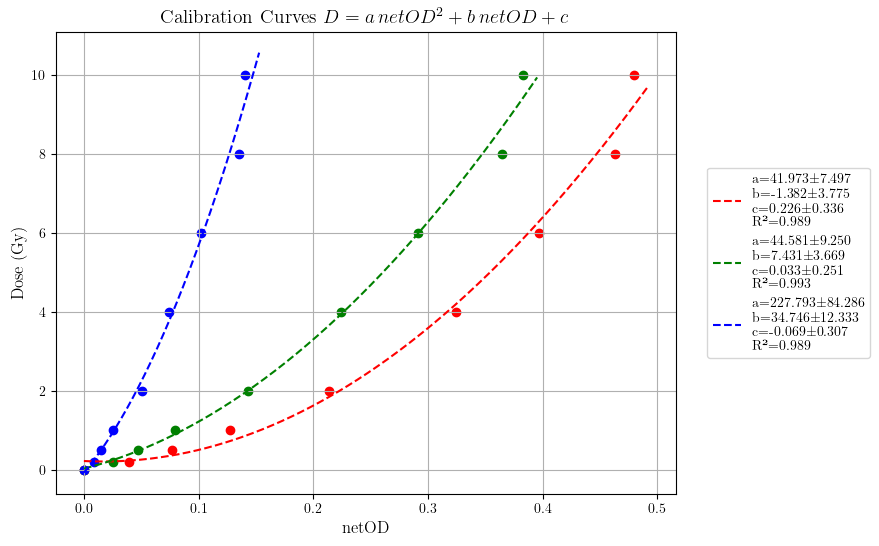

In [52]:
calibracion.graph_calibration_curve()

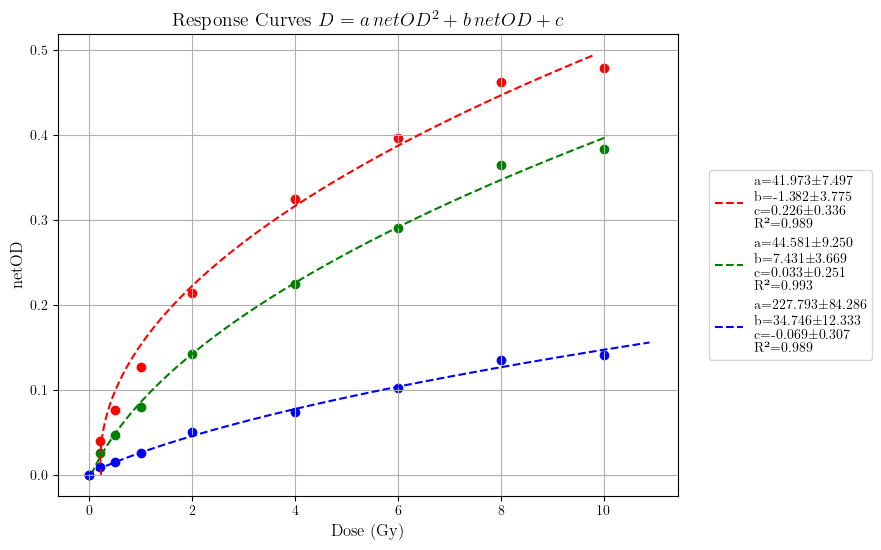

In [53]:
calibracion.graph_response_curve()

In [54]:
print(calibracion)

FilmCalibration(NumDoses=9, NumROIs=18, Type=single-channel)


In [55]:
for key, value in calibracion.__dict__.items():
    print(f"{key}: {value}")

groundtruth_image: [[[249 255 255]
  [249 255 255]
  [249 255 255]
  ...
  [249 255 255]
  [249 255 255]
  [249 255 255]]

 [[249 255 255]
  [249 255 255]
  [249 255 255]
  ...
  [249 255 255]
  [249 255 255]
  [249 255 255]]

 [[249 255 255]
  [249 255 255]
  [249 255 255]
  ...
  [249 255 255]
  [249 255 255]
  [249 255 255]]

 ...

 [[249 255 255]
  [249 255 255]
  [249 255 255]
  ...
  [249 255 255]
  [249 255 255]
  [249 255 255]]

 [[249 255 255]
  [249 255 255]
  [249 255 255]
  ...
  [249 255 255]
  [249 255 255]
  [249 255 255]]

 [[249 255 255]
  [249 255 255]
  [249 255 255]
  ...
  [249 255 255]
  [249 255 255]
  [249 255 255]]]
bits_per_channel: 8
calibration_type: single-channel
filter_type: median
doses: {0: CalibrationDose(value=0, num_rois=2, 2: CalibrationDose(value=2, num_rois=2, 0.2: CalibrationDose(value=0.2, num_rois=2, 4: CalibrationDose(value=4, num_rois=2, 0.5: CalibrationDose(value=0.5, num_rois=2, 6: CalibrationDose(value=6, num_rois=2, 1: CalibrationDose(val

In [56]:
calibracion.to_json("calibracion_test.json")

# Manual verification

In [57]:
netOD_sample = 0.5

a, b, n = 8.05, 96.67, 3.87
dosis_sample = (a*netOD_sample) + (b * (netOD_sample**n)) 
dosis_sample

10.63658575630473

In [58]:
netOD_sample = 0.4

a, b, n = -113.98, 114.11, 0.997
dosis_sample = (a*netOD_sample) + (b * (netOD_sample**n)) 
dosis_sample

0.1776421304607254